# Problem 6 - Part (b)

### Import Libraries

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from PIL import Image
import os

### Define Helper Functions

In [14]:
def load_and_preprocess_image(image_path):
    """
    Load image and convert to RGB array.

    Args:
        image_path (str): Path to the image file

    Returns:
        tuple: (original_image, pixel_array, original_shape)
    """
    # Load image
    image = Image.open(image_path)

    # Convert to RGB if necessary (handles RGBA, grayscale, etc.)
    if image.mode != 'RGB':
        image = image.convert('RGB')

    # Convert to numpy array
    image_array = np.array(image)

    # Store original shape for reconstruction
    original_shape = image_array.shape

    # Reshape to 2D array of pixels (n_pixels, 3)
    pixel_array = image_array.reshape(-1, 3)

    return image, pixel_array, original_shape


def perform_kmeans_segmentation(pixel_array, n_clusters=5):
    """
    Apply K-means clustering to segment image by colors.

    Args:
        pixel_array (np.array): 2D array of pixels
        n_clusters (int): Number of color clusters

    Returns:
        tuple: (labels, cluster_centers)
    """
    # Initialize and fit K-means
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    labels = kmeans.fit_predict(pixel_array)

    return labels, kmeans.cluster_centers_


def reconstruct_image(labels, cluster_centers, original_shape):
    """
    Reconstruct segmented image from cluster labels and centers.

    Args:
        labels (np.array): Cluster labels for each pixel
        cluster_centers (np.array): RGB values of cluster centers
        original_shape (tuple): Original image dimensions

    Returns:
        np.array: Reconstructed image
    """
    # Replace each pixel with its cluster center color
    segmented_pixels = cluster_centers[labels]

    # Reshape back to original image dimensions
    segmented_image = segmented_pixels.reshape(original_shape)

    # Ensure values are in valid range [0, 255]
    segmented_image = np.clip(segmented_image, 0, 255).astype(np.uint8)

    return segmented_image

### Define Visualization and Analysis Functions

In [16]:
def visualize_results(original_image, segmented_images, n_clusters_list):
    """
    Display original and segmented images with different cluster counts.

    Args:
        original_image: Original PIL Image
        segmented_images (list): List of segmented images
        n_clusters_list (list): List of cluster counts used
    """
    n_images = len(segmented_images) + 1
    fig, axes = plt.subplots(1, n_images, figsize=(5*n_images, 5))

    # Display original image
    axes[0].imshow(original_image)
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    # Display segmented images
    for i, (seg_img, n_clusters) in enumerate(zip(segmented_images, n_clusters_list)):
        axes[i+1].imshow(seg_img)
        axes[i+1].set_title(f'K={n_clusters}')
        axes[i+1].axis('off')

    plt.tight_layout()
    plt.show()


def analyze_compression_ratio(original_shape, n_clusters):
    """
    Calculate theoretical compression ratio.

    Args:
        original_shape (tuple): Original image dimensions
        n_clusters (int): Number of clusters used

    Returns:
        float: Compression ratio
    """
    # Original size: height * width * 3 channels * 8 bits
    original_size = original_shape[0] * original_shape[1] * 3 * 8

    # Compressed size: (height * width * log2(n_clusters)) + (n_clusters * 3 * 8)
    compressed_size = (original_shape[0] * original_shape[1] * np.log2(n_clusters) +
                       n_clusters * 3 * 8)

    return original_size / compressed_size

### Configuration

In [17]:
# Configuration
image_path = 'Q6-img.png'
cluster_counts = [2, 4, 8, 16, 32]  # Different K values to test

# Check if image exists
if not os.path.exists(image_path):
    print(f"Error: Image '{image_path}' not found!")
else:
    print(f"Image found: {image_path}")

Image found: Q6-img.png


## Step 1: Load and Preprocess Image

Loading and preprocessing image...
Image shape: (183, 275, 3)
Total pixels: 50325


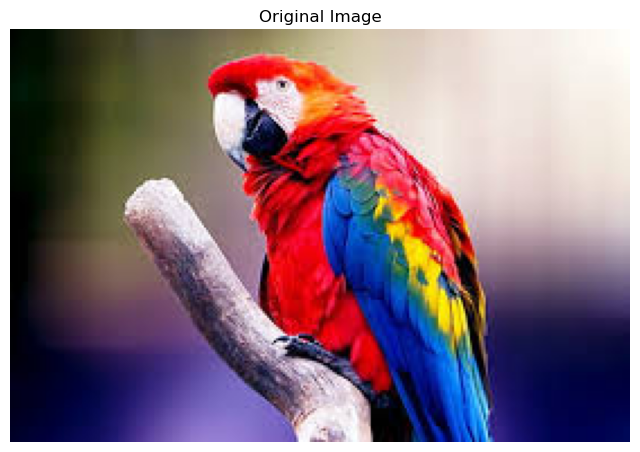

In [18]:
# Step 1: Load and preprocess image
print("Loading and preprocessing image...")
original_image, pixel_array, original_shape = load_and_preprocess_image(image_path)
print(f"Image shape: {original_shape}")
print(f"Total pixels: {pixel_array.shape[0]}")

# Display original image
plt.figure(figsize=(8, 6))
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')
plt.show()

## Step 2: Perform K-means Segmentation

In [19]:
# Step 2: Perform segmentation with different cluster counts
segmented_images = []
results_data = []

for n_clusters in cluster_counts:
    print(f"\nSegmenting with K={n_clusters}...")

    # Apply K-means
    labels, cluster_centers = perform_kmeans_segmentation(
        pixel_array, n_clusters)

    # Reconstruct image
    segmented_image = reconstruct_image(
        labels, cluster_centers, original_shape)
    segmented_images.append(segmented_image)

    # Calculate compression ratio
    compression_ratio = analyze_compression_ratio(original_shape, n_clusters)
    print(f"Theoretical compression ratio: {compression_ratio:.2f}x")

    # Display dominant colors
    print(f"Dominant colors (RGB):")
    for i, color in enumerate(cluster_centers):
        print(f"  Cluster {i}: {color.astype(int)}")

    # Store results for later analysis
    results_data.append({
        'n_clusters': n_clusters,
        'compression_ratio': compression_ratio,
        'cluster_centers': cluster_centers
    })


Segmenting with K=2...
Theoretical compression ratio: 23.98x
Dominant colors (RGB):
  Cluster 0: [74 46 69]
  Cluster 1: [214 192 190]

Segmenting with K=4...
Theoretical compression ratio: 11.99x
Dominant colors (RGB):
  Cluster 0: [107 100 123]
  Cluster 1: [229 214 209]
  Cluster 2: [25 23 53]
  Cluster 3: [216  45  33]

Segmenting with K=8...
Theoretical compression ratio: 7.99x
Dominant colors (RGB):
  Cluster 0: [98 85 77]
  Cluster 1: [232 219 215]
  Cluster 2: [19 17 81]
  Cluster 3: [208  13  24]
  Cluster 4: [ 28  74 173]
  Cluster 5: [149 127 154]
  Cluster 6: [238 139  67]
  Cluster 7: [20 17 15]

Segmenting with K=16...
Theoretical compression ratio: 5.99x
Dominant colors (RGB):
  Cluster 0: [13 12 72]
  Cluster 1: [221 204 199]
  Cluster 2: [225  11  23]
  Cluster 3: [112 102  72]
  Cluster 4: [ 83  64 110]
  Cluster 5: [119 107 190]
  Cluster 6: [241 230 226]
  Cluster 7: [65 57 42]
  Cluster 8: [11 12 12]
  Cluster 9: [237 186  29]
  Cluster 10: [239  84  88]
  Cluster

## Step 3 - Visualize Results


Displaying results...


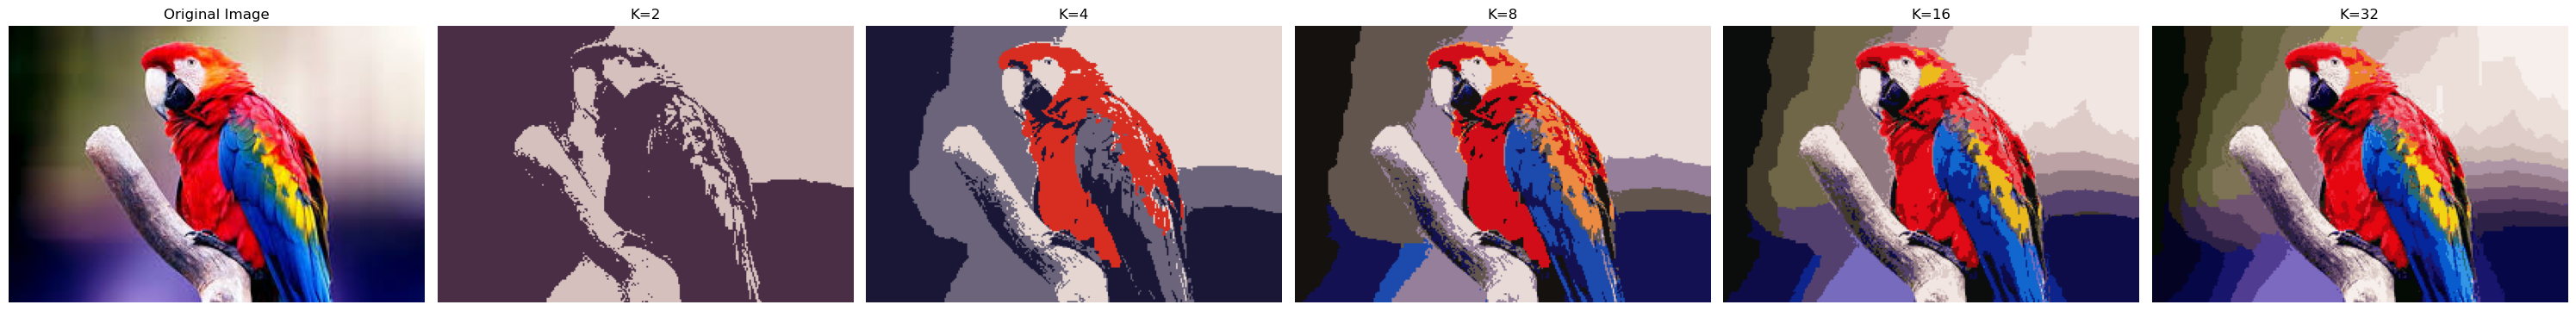

In [20]:
# Step 3: Visualize results
print("\nDisplaying results...")
visualize_results(original_image, segmented_images, cluster_counts)

### Color Palettes

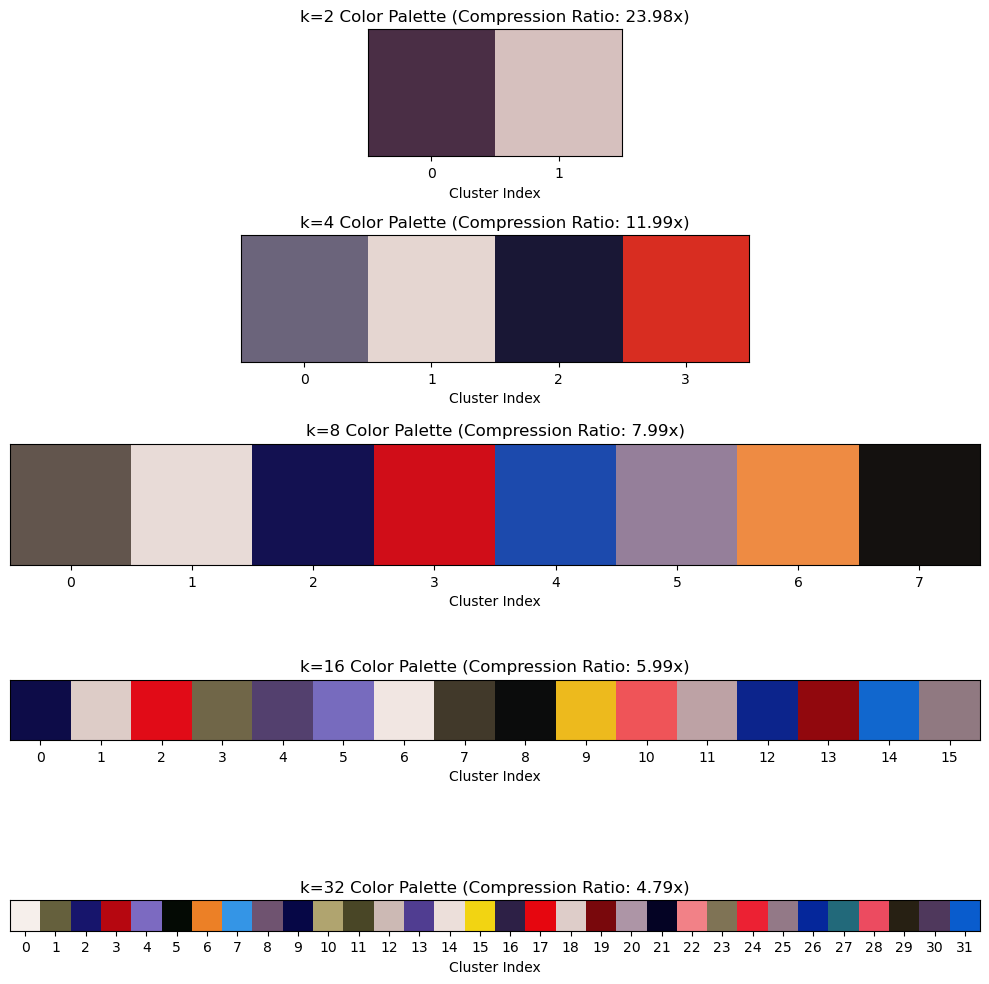

In [21]:
# Visualize color palettes for each K value
fig, axes = plt.subplots(len(cluster_counts), 1,
                         figsize=(10, 2*len(cluster_counts)))

for idx, result in enumerate(results_data):
    k = result['n_clusters']
    centers = result['cluster_centers']

    # Create color palette image
    palette = centers.reshape(1, k, 3).astype(np.uint8)

    axes[idx].imshow(palette)
    axes[idx].set_title(
        f'k={k} Color Palette (Compression Ratio: {result["compression_ratio"]:.2f}x)')
    axes[idx].set_xticks(range(k))
    axes[idx].set_xticklabels(range(k))
    axes[idx].set_yticks([])
    axes[idx].set_xlabel('Cluster Index')

plt.tight_layout()
plt.show()